In [22]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.dpi"] = 120

In [ ]:
import matplotlib.pyplot as plt


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()

In [ ]:
import json
from collections import Counter
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径
file_path = "/root/ftg/results/tokencls_agnews_on_imdb.json"
j2 = "/root/ftg/results/tokencls_agnews.json"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 200

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with open(jsonl_file, "r", encoding="utf-8") as f:
        result = json.load(f)
        for line in result:
            data.append(line[0])  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["ig_gold"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 0)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


import matplotlib.pyplot as plt


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
coordinates_file2 = extract_coordinates(j2)

# Count occurrences in both files
counter_file1 = Counter(coordinates_file1)
counter_file2 = Counter(coordinates_file2)
# counter_file1 = filter_counter(counter_file1)
counter_file2 = filter_counter(counter_file2)
scatter_plot(counter_file1)
scatter_plot(counter_file2)

# Find duplicates between the two files
total_coordinates_combined = set(counter_file1) | set(counter_file2)
duplicate_coordinates = set(counter_file1) & set(counter_file2)
complement_1 = set(counter_file1) - set(counter_file2)
complement_coord = set(counter_file2) - set(counter_file1)

duplicate_count = len(duplicate_coordinates)

total_coordinates_file1 = len(set(counter_file1))
total_coordinates_file2 = len(set(counter_file2))
total_coordinates_combined = len(total_coordinates_combined)
total_complement_1 = len(complement_1)
total_complement_2 = len(complement_coord)

# Calculate duplicate ratios
duplicate_ratio_file1 = (
    duplicate_count / total_coordinates_file1 if total_coordinates_file1 > 0 else 0
)
duplicate_ratio_file2 = (
    duplicate_count / total_coordinates_file2 if total_coordinates_file2 > 0 else 0
)
duplicate_ratio_combined = (
    duplicate_count / total_coordinates_combined
    if total_coordinates_combined > 0
    else 0
)
# 绘制带有重复点标记的散点图

scatter_plot(counter_file1, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file2, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file1, highlight_duplicates=complement_1)
scatter_plot(counter_file2, highlight_duplicates=complement_coord)
# 将集合转换为列表，因为 JSON 不支持集合
complement_1_list = list(complement_1)
complement_2_list = list(complement_coord)

# 写入 JSON 文件
with open("complement_1.json", "w", encoding="utf-8") as f:
    json.dump(complement_1_list, f, ensure_ascii=False, indent=4)
# 写入 JSON 文件
with open("complement_2.json", "w", encoding="utf-8") as f:
    json.dump(complement_2_list, f, ensure_ascii=False, indent=4)

print("写入完成！")

# Print results
print(f"Total coordinates in file 1: {total_coordinates_file1}")
print(f"Total coordinates in file 2: {total_coordinates_file2}")
print(f"Duplicate coordinates between files: {duplicate_count}")
print(f"Difference coordinates_1: {total_complement_1}")
print(f"Difference coordinates_2: {total_complement_2}")
print(f"Ratio of duplicates (file 1): {duplicate_ratio_file1:.2%}")
print(f"Ratio of duplicates (file 2): {duplicate_ratio_file2:.2%}")
print(f"Ratio of duplicates (combined): {duplicate_ratio_combined:.2%}")

In [ ]:
import json
from collections import Counter
import random
import jsonlines

# 读取 JSONL 文件
file_path = "/workspace/ftg/target_neurons/lm_mmlu.json"

# with jsonlines.open(file_path, mode="r") as reader:
#     for obj in reader:
#         print(obj)  # 每个 obj 是一个字典

random.seed(42)
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径

save_dir = "./target_neurons"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 120
full_coord = set((x, y) for x in range(0, 24) for y in range(0, 896))
print(f"坐标总数: {len(full_coord)}")

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with jsonlines.open(jsonl_file, mode="r") as reader:
        for line in reader:
            data.append(line)  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["mvp"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 1)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
unique_coord = set(coordinates_file1)
# Count occurrences in both files
all_coord_counter = Counter(coordinates_file1)
# 获取Counter中的所有键

print(f"去重高贡献坐标总数: {len(unique_coord)}")

# counter_file1 = filter_counter(counter_file1)
# print(len(counter_file1))
complement_coord = full_coord - unique_coord
keys = list(complement_coord)

# # 计算要抽取的元素数量，10%的元素
# RATIO = 10
# sample_size = max(1, int(len(keys) // RATIO))

# # 随机抽取10%的元素
# sampled_keys = random.sample(keys, sample_size)
print(f"非高贡献坐标总数: {len(complement_coord)}")
# print(len(sampled_keys))

# 24* 4864 = 116736
# counter_file2 = filter_counter(counter_file2)
scatter_plot(all_coord_counter)
# scatter_plot(Counter(sampled_keys))
counter_file1_list = list(all_coord_counter)
with open(f"{save_dir}/complement_1.json", "w", encoding="utf-8") as f:
    json.dump(counter_file1_list, f, ensure_ascii=False, indent=4)
# with open(f"{save_dir}/random_RATIO{RATIO}.json", "w", encoding="utf-8") as f:
#     json.dump(sampled_keys, f, ensure_ascii=False, indent=4)

# 随机神经元位置生成

In [ ]:
import json
import random

num_layer = 24
num_neuron = 10

# 生成包含随机整数的列表
random_data = [random.sample(range(896), num_neuron) for _ in range(num_layer)]

# 将数据写入 JSON 文件
with open("random_neurons.json", "w", encoding="utf-8") as f:
    json.dump(random_data, f, ensure_ascii=False, indent=4)

print("JSON 文件已生成！")

In [ ]:
import json
import ast

new_ig_dict = {}

with open("/workspace/ftg/target_neurons/top90_mmlu.json", encoding="utf-8") as f:
    ig_dict = json.load(f)
for key, value in ig_dict.items():
    new_ig_dict[ast.literal_eval(key)] = value
new_ig_dict = dict(sorted(new_ig_dict.items(), key=lambda item: item[1]))
total_elements = len(new_ig_dict)
top_10_percent = int(total_elements * 0.1)
top_10_percent_dict = dict(tuple(new_ig_dict.items())[:top_10_percent])

print(top_10_percent_dict)


# 可视化神经元位置

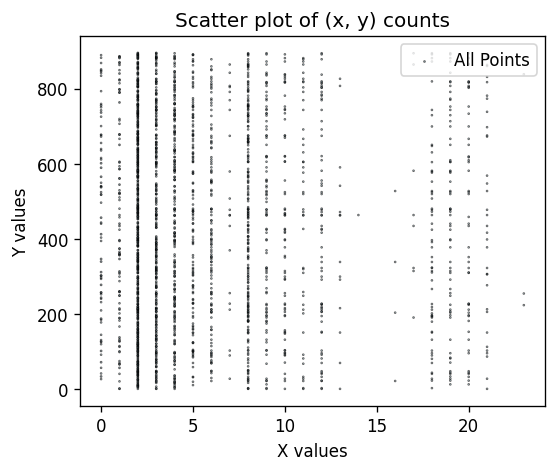

2150


In [23]:
scatter_plot(top_10_percent_dict)
print(len(top_10_percent_dict))

In [ ]:
target_neurons_list = [pos for pos in top_10_percent_dict.keys()]
print(target_neurons_list)
file_name = "mmlu_10percent.json"
with open(f"./target_neurons/{file_name}", "w", encoding="utf-8") as f:
    json.dump(target_neurons_list, f, ensure_ascii=False, indent=4)


# 合并神经元

In [ ]:
import json

def merge_and_sum_dicts(file1, file2):
    # 读取第一个 JSON 文件
    with open(file1, 'r') as f1:
        dict1 = json.load(f1)
    
    # 读取第二个 JSON 文件
    with open(file2, 'r') as f2:
        dict2 = json.load(f2)
    
    # 创建一个新的字典来存储相加后的值
    result = {}
    
    # 遍历第一个字典的键
    for key in dict1:
        if key in dict2:
            # 如果键在两个字典中都存在，将值相加
            result[key] = dict1[key] + dict2[key]
        else:
            # 如果键只在第一个字典中存在，直接添加到结果中
            result[key] = dict1[key]
    
    # 遍历第二个字典的键，处理只在第二个字典中存在的键
    for key in dict2:
        if key not in dict1:
            result[key] = dict2[key]
    
    return result

# 示例用法
file1 = '/workspace/ftg/test/ll_merged.json'
file2 = '/workspace/ftg/test/lm_mmlu.json'
result_dict = merge_and_sum_dicts(file1, file2)
print(result_dict)
with open("merged.json", "w", encoding="utf-8") as f:
    json.dump(result_dict, f, ensure_ascii=False, indent=4)

In [ ]:
import h5py
filename = "/workspace/ftg/hdf5/mmlu.h5"
with h5py.File(filename, "a") as f:
    print(f["dataset"].shape)

(8497, 24, 896)
[[ 1.6250610e-03  2.4261475e-03  2.9945374e-04 ...  2.0599365e-03
  -1.1672974e-03  1.8692017e-03]
 [ 2.4414062e-04 -2.6583672e-05 -3.6621094e-04 ...  1.0967255e-04
   9.5748901e-04  2.2172928e-05]
 [-1.2359619e-03  2.2888184e-03  2.0904541e-03 ...  1.2283325e-03
  -5.9604645e-06 -3.1661987e-04]
 ...
 [ 7.0190430e-04  2.2125244e-04  1.8477440e-05 ...  3.3378601e-04
   4.2152405e-04 -1.5354156e-04]
 [ 1.3198853e-03 -2.3269653e-04 -2.1457672e-05 ... -1.2588501e-03
   9.3078613e-04  3.7384033e-03]
 [ 9.1552734e-04 -3.8757324e-03 -4.2533875e-04 ... -2.5868416e-05
   4.0588379e-03  3.3874512e-03]]


In [5]:
from datasets import load_dataset
from tqdm import tqdm
mmlu_all_sets = [
    "college_biology",
    "college_chemistry",
    "college_computer_science",
    "college_mathematics",
    "college_physics",
    "electrical_engineering",
    "astronomy",
    "anatomy",
    "abstract_algebra",
    "machine_learning",
    "clinical_knowledge",
    "global_facts",
    "management",
    "nutrition",
    "marketing",
    "professional_accounting",
    "high_school_geography",
    "international_law",
    "moral_scenarios",
    "computer_security",
    "high_school_microeconomics",
    "professional_law",
    "medical_genetics",
    "professional_psychology",
    "jurisprudence",
    "world_religions",
    "philosophy",
    "virology",
    "high_school_chemistry",
    "public_relations",
    "high_school_macroeconomics",
    "human_sexuality",
    "elementary_mathematics",
    "high_school_physics",
    "high_school_computer_science",
    "high_school_european_history",
    "business_ethics",
    "moral_disputes",
    "high_school_statistics",
    "miscellaneous",
    "formal_logic",
    "high_school_government_and_politics",
    "prehistory",
    "security_studies",
    "high_school_biology",
    "logical_fallacies",
    "high_school_world_history",
    "professional_medicine",
    "high_school_mathematics",
    "college_medicine",
    "high_school_us_history",
    "sociology",
    "econometrics",
    "high_school_psychology",
    "human_aging",
    "us_foreign_policy",
    "conceptual_physics",
]
total_len = 0
for subset in tqdm(mmlu_all_sets):
    dataset = load_dataset("cais/mmlu", subset)
    total_len += len(dataset["test"])
    print(total_len)
    print(subset)

  2%|▏         | 1/57 [00:08<08:18,  8.91s/it]

144
college_biology


  4%|▎         | 2/57 [00:19<08:49,  9.63s/it]

244
college_chemistry


  5%|▌         | 3/57 [00:28<08:29,  9.44s/it]

344
college_computer_science


  7%|▋         | 4/57 [00:38<08:30,  9.63s/it]

444
college_mathematics


  9%|▉         | 5/57 [00:46<07:55,  9.15s/it]

546
college_physics


 11%|█         | 6/57 [00:54<07:33,  8.89s/it]

691
electrical_engineering


 12%|█▏        | 7/57 [01:04<07:35,  9.10s/it]

843
astronomy


 14%|█▍        | 8/57 [01:11<06:57,  8.52s/it]

978
anatomy


 16%|█▌        | 9/57 [01:18<06:24,  8.00s/it]

1078
abstract_algebra


 18%|█▊        | 10/57 [01:29<06:57,  8.89s/it]

1190
machine_learning


 19%|█▉        | 11/57 [01:37<06:31,  8.52s/it]

1455
clinical_knowledge


 21%|██        | 12/57 [01:45<06:23,  8.52s/it]

1555
global_facts


 23%|██▎       | 13/57 [01:53<06:04,  8.29s/it]

1658
management


 25%|██▍       | 14/57 [02:02<06:06,  8.53s/it]

1964
nutrition


 26%|██▋       | 15/57 [02:10<05:50,  8.34s/it]

2198
marketing


 28%|██▊       | 16/57 [02:20<06:06,  8.94s/it]

2480
professional_accounting


 30%|██▉       | 17/57 [02:29<05:52,  8.81s/it]

2678
high_school_geography


 32%|███▏      | 18/57 [02:37<05:40,  8.72s/it]

2799
international_law


 33%|███▎      | 19/57 [02:48<05:55,  9.36s/it]

3694
moral_scenarios


 35%|███▌      | 20/57 [02:59<06:02,  9.80s/it]

3794
computer_security


 37%|███▋      | 21/57 [03:08<05:45,  9.60s/it]

4032
high_school_microeconomics


 39%|███▊      | 22/57 [03:19<05:52, 10.07s/it]

5566
professional_law


 40%|████      | 23/57 [03:28<05:29,  9.69s/it]

5666
medical_genetics


 42%|████▏     | 24/57 [03:39<05:32, 10.07s/it]

6278
professional_psychology


 44%|████▍     | 25/57 [03:48<05:13,  9.81s/it]

6386
jurisprudence


 46%|████▌     | 26/57 [03:59<05:13, 10.13s/it]

6557
world_religions


 47%|████▋     | 27/57 [04:09<05:01, 10.04s/it]

6868
philosophy


 49%|████▉     | 28/57 [04:18<04:46,  9.88s/it]

7034
virology


 51%|█████     | 29/57 [04:27<04:28,  9.59s/it]

7237
high_school_chemistry


 53%|█████▎    | 30/57 [04:35<04:07,  9.18s/it]

7347
public_relations


 54%|█████▍    | 31/57 [04:45<04:00,  9.24s/it]

7737
high_school_macroeconomics


 56%|█████▌    | 32/57 [04:57<04:09,  9.97s/it]

7868
human_sexuality


 58%|█████▊    | 33/57 [05:06<03:52,  9.68s/it]

8246
elementary_mathematics


 60%|█████▉    | 34/57 [05:15<03:40,  9.57s/it]

8397
high_school_physics


 61%|██████▏   | 35/57 [05:24<03:24,  9.31s/it]

8497
high_school_computer_science


 63%|██████▎   | 36/57 [05:31<03:05,  8.86s/it]

8662
high_school_european_history


 65%|██████▍   | 37/57 [05:41<03:01,  9.06s/it]

8762
business_ethics


 67%|██████▋   | 38/57 [06:02<04:01, 12.73s/it]

9108
moral_disputes


 68%|██████▊   | 39/57 [06:12<03:31, 11.74s/it]

9324
high_school_statistics


 70%|███████   | 40/57 [06:21<03:07, 11.01s/it]

10107
miscellaneous


 72%|███████▏  | 41/57 [06:31<02:50, 10.63s/it]

10233
formal_logic


 74%|███████▎  | 42/57 [06:42<02:44, 10.97s/it]

10426
high_school_government_and_politics


 75%|███████▌  | 43/57 [06:52<02:26, 10.48s/it]

10750
prehistory


 77%|███████▋  | 44/57 [07:03<02:17, 10.56s/it]

10995
security_studies


 79%|███████▉  | 45/57 [07:15<02:12, 11.07s/it]

11305
high_school_biology


 81%|████████  | 46/57 [07:24<01:55, 10.52s/it]

11468
logical_fallacies


 82%|████████▏ | 47/57 [07:33<01:39,  9.92s/it]

11705
high_school_world_history


 84%|████████▍ | 48/57 [07:43<01:30, 10.01s/it]

11977
professional_medicine


 86%|████████▌ | 49/57 [07:51<01:16,  9.59s/it]

12247
high_school_mathematics


 88%|████████▊ | 50/57 [07:59<01:03,  9.10s/it]

12420
college_medicine


 89%|████████▉ | 51/57 [08:07<00:52,  8.77s/it]

12624
high_school_us_history


 91%|█████████ | 52/57 [08:16<00:43,  8.60s/it]

12825
sociology


 93%|█████████▎| 53/57 [08:24<00:33,  8.47s/it]

12939
econometrics


 95%|█████████▍| 54/57 [08:32<00:24,  8.33s/it]

13484
high_school_psychology


 96%|█████████▋| 55/57 [08:41<00:17,  8.72s/it]

13707
human_aging


 98%|█████████▊| 56/57 [08:53<00:09,  9.66s/it]

13807
us_foreign_policy


100%|██████████| 57/57 [09:04<00:00,  9.55s/it]

14042
conceptual_physics
